In [6]:
import snntorch as snn 
import torch

In [7]:
batch_size = 128
data_path = "../data/"
num_classes = 10
dtype = torch.float

In [8]:
from torchvision import datasets,transforms

transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0,),(1,))
])
mnist_train = datasets.MNIST(data_path,train=True,download=True,transform=transform)

100%|██████████| 9912422/9912422 [00:04<00:00, 2041100.62it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 3711265.13it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 1979200.16it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 736252.32it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [38]:
from snntorch import utils 
subset = 10 
mnist_train = utils.data_subset(mnist_train,subset)
print("Size of the data: {}".format(len(mnist_train)))

Size of the data: 600


In [39]:
from torch.utils.data import DataLoader
train_loader = DataLoader(mnist_train,batch_size=batch_size,shuffle=True)

In [40]:
num_steps = 10
raw_vector = torch.ones(num_steps)*.5 
rate_coded_vector = torch.bernoulli(raw_vector)
print(f"Converted vector: {rate_coded_vector}")
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

Converted vector: tensor([1., 0., 1., 0., 1., 1., 1., 1., 0., 1.])
The output is spiking 70.00% of the time.


In [41]:
num_steps = 100

raw_vector = torch.ones(num_steps)*0.5

rate_coded_vector = torch.bernoulli(raw_vector)
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

The output is spiking 48.00% of the time.


In [42]:
from snntorch import spikegen 
data = iter(train_loader)
data_it,targets_it = next(data)

spike_data = spikegen.rate(data_it,num_steps=num_steps)

In [43]:
print(spike_data.size())

torch.Size([100, 128, 1, 28, 28])


In [44]:
import matplotlib.pyplot as plt 
import snntorch.spikeplot as splt 

In [45]:
spike_data_sample = spike_data[:,0,0]
print(spike_data_sample.size())

torch.Size([100, 28, 28])


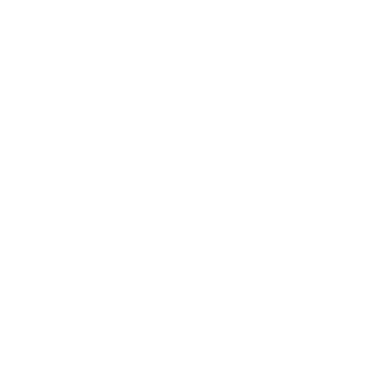

In [46]:
from IPython.display import HTML
fig,ax = plt.subplots()
anim = splt.animator(spike_data_sample,fig,ax)
HTML(anim.to_html5_video())

In [47]:
anim.save("../data/spike_mnist_data.mp4")

In [48]:
print(f"the target was: {targets_it[0]}")

the target was: 0


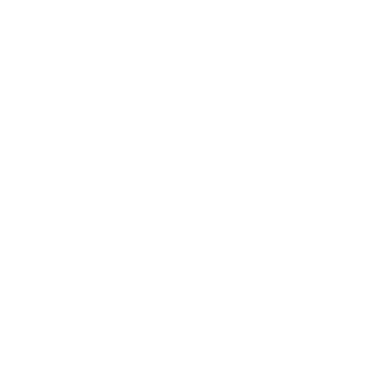

In [49]:
spike_data = spikegen.rate(data_it,num_steps=num_steps,gain=0.25)
spike_data_sample2 = spike_data[:,0,0]
fig,ax = plt.subplots()
anim = splt.animator(spike_data_sample2,fig,ax)
HTML(anim.to_html5_video())

Text(0.5, 1.0, 'Gain = 0.25')

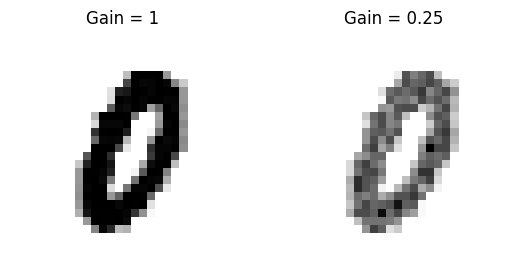

In [50]:
plt.figure(facecolor="w")
plt.subplot(1,2,1)
plt.imshow(spike_data_sample.mean(axis=0).reshape((28,-1)).cpu(),cmap="binary")
plt.axis("off")
plt.title('Gain = 1')


plt.subplot(1,2,2)
plt.imshow(spike_data_sample2.mean(axis=0).reshape((28,-1)).cpu(),cmap="binary")
plt.axis("off")
plt.title('Gain = 0.25')

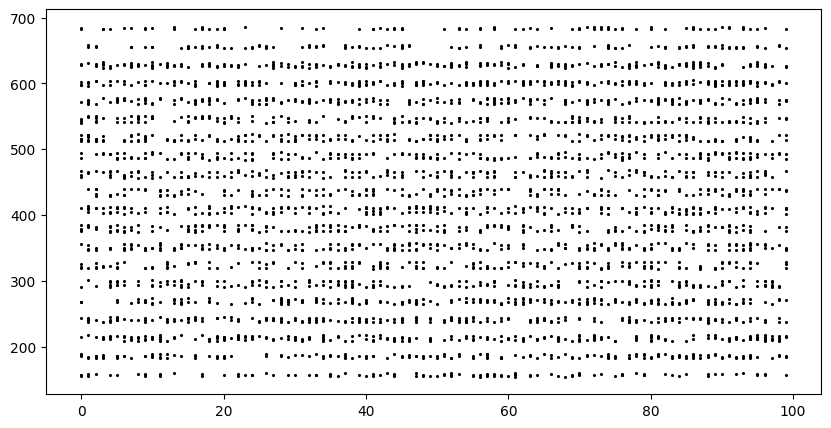

In [51]:
spike_data_sample2 = spike_data_sample2.reshape((num_steps,-1))

fig = plt.figure(facecolor="w",figsize=(10,5))
ax = fig.add_subplot(111)
splt.raster(spike_data_sample2,ax,s=1.5,c="black")

([], [])

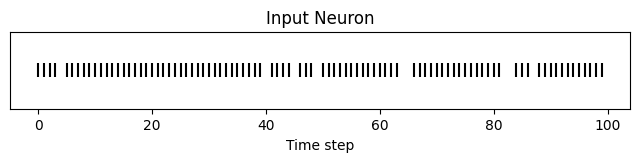

In [52]:
idx = 210  

fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

splt.raster(spike_data_sample.reshape(num_steps, -1)[:, idx].unsqueeze(1), ax, s=100, c="black", marker="|")

plt.title("Input Neuron")
plt.xlabel("Time step")
plt.yticks([])